## Model View Projection Matrix tests

In [ ]:
%matplotlib inline

In [ ]:
blue = np.load('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan24/blue/blue_buffer.npy',allow_pickle=True).item()
print(np.around(np.array(blue[1].cpu().detach())))

/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/lv1/blue/blue.npy
dict_keys([12, 3, 0, 13, 7])
0
0 bad points


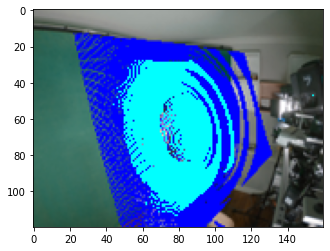

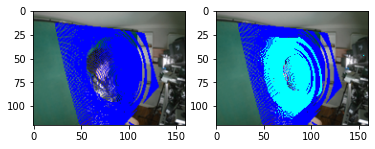

3
0 bad points


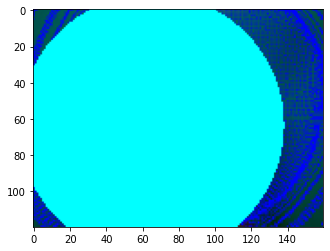

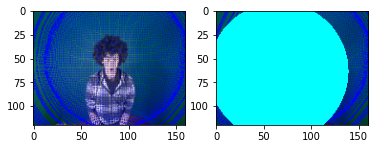

7
4336 bad points


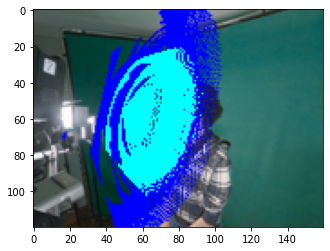

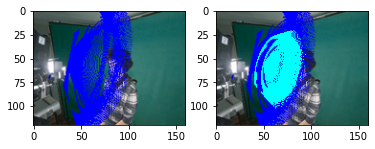

12
4552 bad points


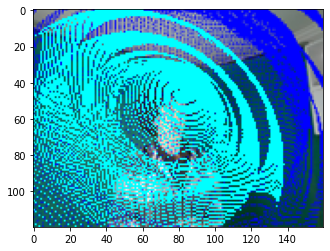

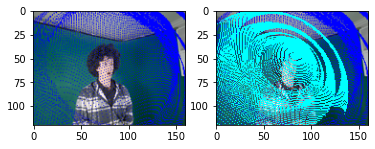

13
4336 bad points


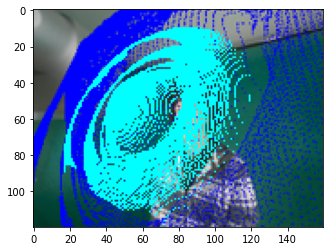

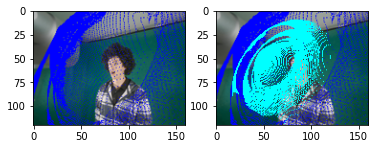

In [297]:
# PROJECTION AND REPROJECTION from METANLR CODE
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import torch

test = True
# test = False
if test:
    # location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test24/blue'
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test55/blue'
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/lv1/blue'
    
    # locationGT = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan24/blue'
    locationGT = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan55/blue'
    locationGT = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/nlr_processed_renamed/lv1-lowres/blue'
else:
    # location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan24/blue'
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan55/blue'
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/nlr_processed_renamed/lv1-lowres/blue'
    # location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/curls/blue'


blue = np.load(location+'/blue.npy',allow_pickle=True).item()

print(location+'/blue.npy')
ii=0
print(blue.keys())
for id in sorted(blue.keys()):

    b = np.array(blue[id].cpu().detach())
    dim = np.array(b.shape[:2])
    temp = dim[0]
    dim[0] = dim[1]
    dim[1] = temp

    if test:
        im2 = locationGT+'/'+str(id).zfill(6)+'_rgb.png'
    else:
        im2 = location+'-og/'+str(id).zfill(6)+'_rgb.png'

    img2 = mpimg.imread(im2)
    img2 = np.array(Image.fromarray((img2*255).astype(np.uint8)).resize(dim))

    img2og = img2.copy()
    bad = 0
    for i in range(b.shape[0]):
        for j in range(b.shape[1]):
            x1 = int(b[i,j,1] * -(dim[1]/2) + (dim[1]/2)) 
            x2 = int(b[i,j,0] *  (dim[0]/2) + (dim[0]/2))
            # img2[x1,x2,:] = [0,255.,255.]
            if x1 < dim[1] and x2 < dim[0] and x1 > -1 and x2 > -1:
                if test:
                    img2[x1,x2,:] = [0,255.,255.]
                else:
                    img2[x1,x2,:] = [0,0.,255.]
            else:
                # print('bad',x1, x2)
                bad = bad + 1
                pass
    print(id)
    print(bad, 'bad points')
    plt.imshow(img2)


    fig=plt.figure()
    fig.add_subplot(1,2,ii+2)
    plt.imshow(img2)
    fig.add_subplot(1,2,ii+1)
    plt.imshow(img2og)

    img2og = Image.fromarray((img2og).astype(np.uint8))
    img2   = Image.fromarray((img2).astype(np.uint8))
    img2.save(location+'/'+str(id).zfill(6)+'_rgb.png')
    img2og.save(location+'/'+str(id).zfill(6)+'_rgb_OG.png')

    plt.show()

In [238]:
blue

{3: tensor([[[-0.9959,  0.9976,  1.0000],
          [-0.9795,  0.9984,  1.0000],
          [-0.9627,  0.9979,  1.0000],
          ...,
          [ 0.9626,  0.9974,  1.0000],
          [ 0.9795,  0.9988,  1.0000],
          [ 0.9957,  0.9979,  1.0000]],
 
         [[-0.9964,  0.9864,  1.0000],
          [-0.9796,  0.9859,  1.0000],
          [-0.9628,  0.9855,  1.0000],
          ...,
          [ 0.9625,  0.9860,  1.0000],
          [ 0.9793,  0.9861,  1.0000],
          [ 0.9955,  0.9852,  1.0000]],
 
         [[-0.9964,  0.9740,  1.0000],
          [-0.9796,  0.9736,  1.0000],
          [-0.9629,  0.9731,  1.0000],
          ...,
          [ 0.9624,  0.9734,  1.0000],
          [ 0.9792,  0.9734,  1.0000],
          [ 0.9962,  0.9726,  1.0000]],
 
         ...,
 
         [[-0.9956, -0.9726,  1.0000],
          [-0.9788, -0.9726,  1.0000],
          [-0.9620, -0.9725,  1.0000],
          ...,
          [ 0.9621, -0.9724,  1.0000],
          [ 0.9790, -0.9721,  1.0000],
          [ 0.9

In [ ]:
#convert to png from jpg
from PIL import Image
import os

directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/nlr_processed_renamed/lv1-lowres/blue-og/'
c=1
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        # print(filename)
        im = Image.open(directory+filename)
        name=directory+filename[:-4]+'.png'
        print(name)
        rgb_im = im.convert('RGB')
        rgb_im.save(name)
        c+=1
        # print(os.path.join(directory, filename))
        continue
    else:
        continue


In [ ]:
b.shape

In [ ]:
b.reshape(-1,3).T

In [239]:
b = np.array(blue[3].cpu().detach())
print(b.shape)
b = b.reshape((-1,3))
# print(np.min(b,axis=0)-np.max(b,axis=0))
print(np.min(b,axis=0))
print(np.max(b,axis=0))
print(b.shape)
# print(np.min(b[0],axis=0))

(160, 120, 3)
[-0.99681085 -0.997939    1.        ]
[0.9966911  0.99923235 1.        ]
(19200, 3)


In [ ]:
72*96

In [ ]:
# PROJECTION AND REPROJECTION for M center
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import torch

test = True
# test = False
if test:
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/blue/'
else:
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan24/blue-fixed/'
# blue = np.load(location+'blue_buffer.npy',allow_pickle=True).item()
blue = np.load(location+'blue.npy',allow_pickle=True).item()

print(location+'blue.npy')
ii=0
print(blue.keys())
for id in sorted(blue.keys()):

    b = np.array(blue[id].cpu().detach())
    # b = b[65:85, 45:65, :]

    if test:
        im2 = './my_data/dtu_v3/processed/scan24/blue-og/'+str(id).zfill(6)+'_rgb.png'
    else:
        im2 = './my_data/my_dtu/nlr/test/og/'+str(id).zfill(6)+'_rgb.png'

    img2 = mpimg.imread(im2)
    img2 = np.array(Image.fromarray((img2*255).astype(np.uint8)).resize((160,120)))
    img2og = img2.copy()
    bad = 0
    for j in range(b.shape[1]):
        x1 = int(b[j,1] * -60 + 60)
        x2 = int(b[j,0] * 80 + 80)
        # img2[x1,x2,:] = [0,255.,255.]
        if x1 < 120 and x2 < 160 and x1 > -1 and x2 > -1:
            if test:
                img2[x1,x2,:] = [0,255.,255.]
                # img2[x1-3:x1+3, x2-3:x2+3, :] = [0,255.,255.]
            else:
                img2[x1,x2,:] = [0,0.,255.]
        else:
            # print('bad',x1, x2)
            bad = bad + 1
            pass
    print(id)
    print(bad, 'bad points')
    plt.imshow(img2)


    # ii=ii+1
    fig=plt.figure()
    fig.add_subplot(1,2,ii+2)
    plt.imshow(img2)
    fig.add_subplot(1,2,ii+1)
    plt.imshow(img2og)

    img2og = Image.fromarray((img2og).astype(np.uint8))
    img2   = Image.fromarray((img2).astype(np.uint8))
    img2.save(location+str(id).zfill(6)+'_rgb.png')
    img2og.save(location+str(id).zfill(6)+'_rgb_OG.png')

    plt.show()
    # print(np.amin(b),np.amax(b))

In [ ]:
# PROJECTION AND REPROJECTION for M center
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import torch

test = True
# test = False
if test:
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/blue/'
else:
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan24/blue-fixed/'
# blue = np.load(location+'blue_buffer.npy',allow_pickle=True).item()
blue = np.load(location+'blue.npy',allow_pickle=True).item()

print(location+'blue.npy')
ii=0
print(blue.keys())
for id in sorted(blue.keys()):

    b = np.array(blue[id].cpu().detach())
    # b = b[65:85, 45:65, :]

    if test:
        im2 = './my_data/dtu_v3/processed/scan24/blue-correct/'+str(id).zfill(6)+'_rgb.png'
    else:
        im2 = './my_data/my_dtu/nlr/test/og/'+str(id).zfill(6)+'_rgb.png'

    img2 = mpimg.imread(im2)
    img2 = np.array(Image.fromarray((img2*255).astype(np.uint8)).resize((160,120)))
    img2og = img2.copy()
    bad = 0
    for j in range(b.shape[1]):
        x1 = int(b[j,1] * -60 + 60)
        x2 = int(b[j,0] * 80 + 80)
        # img2[x1,x2,:] = [0,255.,255.]
        if x1 < 120 and x2 < 160 and x1 > -1 and x2 > -1:
            if test:
                img2[x1,x2,:] = [0,255.,255.]
                img2[x1-3:x1+3, x2-3:x2+3, :] = [0,255.,255.]
            else:
                img2[x1,x2,:] = [0,0.,255.]
        else:
            # print('bad',x1, x2)
            bad = bad + 1
            pass
    print(id)
    print(bad, 'bad points')
    plt.imshow(img2)


    # ii=ii+1
    fig=plt.figure()
    fig.add_subplot(1,2,ii+2)
    plt.imshow(img2)
    fig.add_subplot(1,2,ii+1)
    plt.imshow(img2og)

    img2og = Image.fromarray((img2og).astype(np.uint8))
    img2   = Image.fromarray((img2).astype(np.uint8))
    img2.save(location+str(id).zfill(6)+'_rgb.png')
    img2og.save(location+str(id).zfill(6)+'_rgb_OG.png')

    plt.show()
    # print(np.amin(b),np.amax(b))

In [ ]:

# # print(np.ones_like(points)[:,1].reshape(1,-1).shape, points.T.shape)
# points = np.concatenate((points.T, np.ones_like(points)[:,0].reshape(1,-1)), 0)
# # Rt = np.concatenate((np.eye(3),np.array([cam['position']]).transpose()),axis=1)#np.array(cam['orientation'])
# Rt = np.eye(4)
# Rt[3,:3] = -1*np.array([cam['position']])
# translated_points2 = (np.matmul(Rt, points))
# print(points.shape, translated_points2.shape,np.array(cam['orientation']).shape)
# Rt = np.eye(4)
# Rt[:3,:3] = np.array(cam['orientation'])
# local_points2 = (np.matmul(Rt, translated_points2)).T
# print(local_points2)
# translated_points2 = translated_points2[:3,:].T
# print(translated_points.shape, translated_points2.shape)
# print(translated_points2)
# print(translated_points)
# print(translated_points==translated_points2.T)
# # print((local_points2==local_points).all())

directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/scan24/'
location =  '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/'


points = np.load(directory+'points.npy',allow_pickle=True)
key = 1
file = open(directory+'camera/'+str(key).zfill(6)+'.json')
cam = json.load(file)

points = points.reshape((-1, 3))
translated_points = points - cam['position']
local_points = (np.matmul(cam['orientation'], translated_points.T)).T
np.set_printoptions(suppress=True)
# print(local_points)

points2 = np.concatenate((points.T, np.ones_like(points)[:,0].reshape(1,-1)), 0)
T = np.eye(4, dtype=np.float32)
T[:3,3] = -1*np.array(cam['position'])
# print(T)
translated_points2 = np.matmul(T,points2)
R = np.eye(4, dtype=np.float32)
R[:3,:3] = np.array(cam['orientation'])
local_points2 = (np.matmul(R, translated_points2)).T[:,:3]



Rt = (np.matmul(R,T))
print(R)
print(T)
print(Rt)
# local_points3 = np.matmul(Rt,points2).T[:,:3]
local_points3 = (np.matmul(Rt,points2)).T[:,:3]
print(local_points3)
# print((translated_points2.T[:,:3]==translated_points).all())
print((local_points2==local_points).all())
print((local_points3==local_points).all())
print((local_points-local_points3<0.00001).all())

dict_keys([1, 9, 17, 23, 31, 38, 44])
1
bad pts:  101


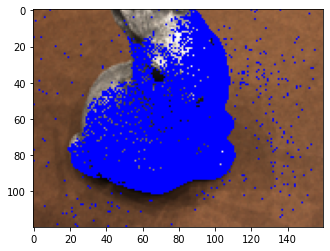

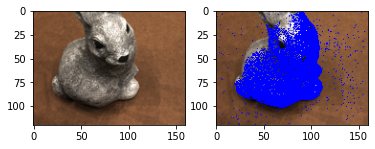

9
bad pts:  190


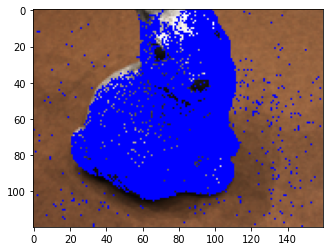

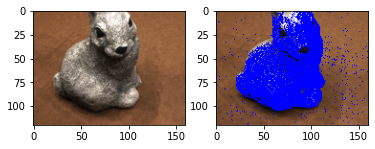

17
bad pts:  423


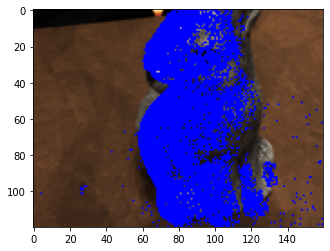

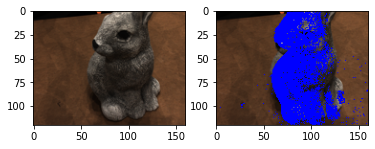

23
bad pts:  924


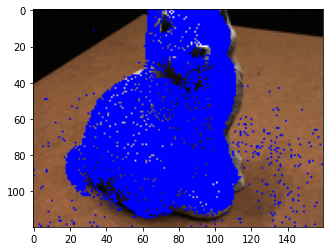

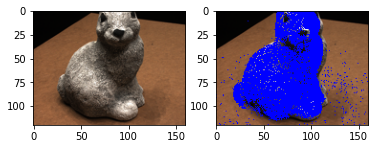

31
bad pts:  1104


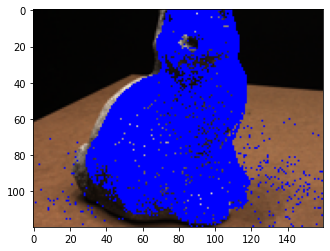

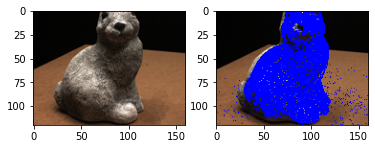

38
bad pts:  1323


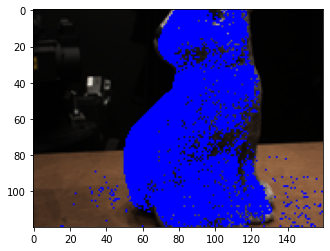

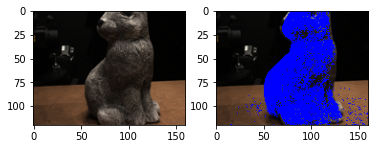

44
bad pts:  1045


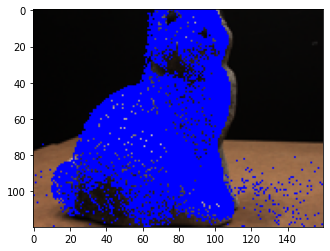

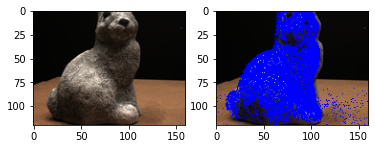

In [294]:
# 3D PTS Projection from IPYNB nerfies projection DTU

# import required module
import os
import json
import numpy as np
from scipy.spatial.transform import Rotation as R

test = False
# test = True

directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/colmap_outputs/scan24'
directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/colmap_outputs/scan55'


if test:
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/blue-colmap'
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test55/blue-colmap'
    
    locationGT = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan24/blue-colmap'
    locationGT = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan55/blue-colmap'
else:
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan24/blue-colmap'
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan55/blue-colmap'



points = np.load(directory+'/points.npy',allow_pickle=True)
y = json.load(open(directory+'/scene.json'))
directory = directory+'/camera'  


blue = {}
i = 0
# iterate over files in that directory
for NLRkey in [1, 9, 17, 23, 31, 38, 44]:
    ## scan24
    if NLRkey == 1:
        key = 2
    if NLRkey == 9:
        key = 10
    if NLRkey == 17:
        key = 18
    if NLRkey == 23:
        key = 26
    if NLRkey == 31:
        key = 35
    if NLRkey == 38:
        key = 42
    if NLRkey == 44: 
        key = 48

    ## scan55
    if NLRkey == 1:
        key = 2
    if NLRkey == 9:
        key = 10
    if NLRkey == 17:
        key = 20
    if NLRkey == 23:
        key = 26
    if NLRkey == 31:
        key = 34
    if NLRkey == 38:
        key = 41
    if NLRkey == 44: 
        key = 47
    
    file = open(directory+'/'+str(key).zfill(6)+'.json')
    cam = json.load(file)

    # batch_shape = points.shape[:-1]
    points = points.reshape((-1, 3))
    # local_points = self.points_to_local_points(points)
    translated_points = points - cam['position']
    local_points = (np.matmul(cam['orientation'], translated_points.T)).T

    # Get normalized local pixel positions.
    x = local_points[..., 0] / local_points[..., 2]
    y = local_points[..., 1] / local_points[..., 2]

    # Apply radial distortion.
    r2 = x**2 + y**2
    distortion = 1.0 + r2 * (
        cam['radial_distortion'][0] + r2 *
        (cam['radial_distortion'][1] + cam['radial_distortion'][2] * r2))

    # Apply tangential distortion.
    x_times_y = x * y
    x = (
        x * distortion + 2.0 * cam['tangential_distortion'][0] * x_times_y +
        cam['tangential_distortion'][1] * (r2 + 2.0 * x**2))
    y = (
        y * distortion + 2.0 * cam['tangential_distortion'][1] * x_times_y +
        cam['tangential_distortion'][0] * (r2 + 2.0 * y**2))

    # Map the distorted ray to the image plane and return the depth.
    pixel_x = cam['focal_length'] * x + cam['skew'] * y + cam['principal_point'][0]
    pixel_y = cam['focal_length'] * cam['pixel_aspect_ratio'] * y + cam['principal_point'][1]

    pixels = np.stack([pixel_x, pixel_y], axis=-1)
    blue[NLRkey] = pixels
    # red
# np.save('./my_data/my_dtu/nlr/test/blue/ptsproj.npy', SneDict, allow_pickle=True)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import torch

ii=0
print(blue.keys())
for id in sorted(blue.keys()):

    b = np.array(blue[id])

    if test:
        im2 = locationGT+'/'+str(id).zfill(6)+'_rgb.png'
    else:
        im2 = location[:-7]+'-og/'+str(id).zfill(6)+'_rgb.png'

    img2 = mpimg.imread(im2)
    shape = img2.shape
    new_shape = (160,120)
    img2 = np.array(Image.fromarray((img2*255).astype(np.uint8)).resize(new_shape))
    img2og = img2.copy()
    bad = 0
    for i in range(len(b)):
        x1 = int(b[i,1]/(shape[0]/new_shape[1]))
        x2 = int(b[i,0]/(shape[0]/new_shape[1]))
        if x1 < 120 and x2 < 160 and x1 > -1 and x2 > -1:
            if test:
                img2[x1,x2,:] = [0,255.,255.]
            else:
                img2[x1,x2,:] = [0,0.,255.]
        else:
            bad = bad + 1
            pass
    


    print(id)
    print('bad pts: ', bad)
    plt.imshow(img2)
    fig=plt.figure()
    fig.add_subplot(1,2,ii+2)
    plt.imshow(img2)
    fig.add_subplot(1,2,ii+1)
    plt.imshow(img2og)

    img2og = Image.fromarray((img2og).astype(np.uint8))
    img2   = Image.fromarray((img2).astype(np.uint8))
    img2.save(location+'/'+str(id).zfill(6)+'_rgb.png')
    img2og.save(location+'/'+str(id).zfill(6)+'_rgb_OG.png')

    plt.show()

In [ ]:
x = b
print(np.min(x,axis=0))
print(np.max(x,axis=0))
print(np.mean(x,axis=0))

dict_keys([0, 1, 2, 3, 4, 5, 6])
(3292, 2)
0
bad pts:  385
/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/curls/blue-colmap/000000_rgb.png


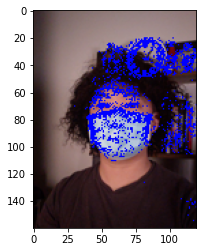

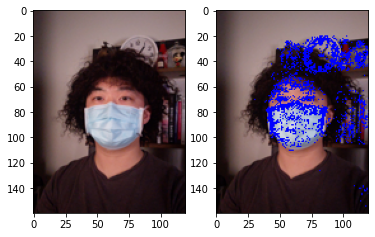

(3292, 2)
1
bad pts:  958
/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/curls/blue-colmap/000001_rgb.png


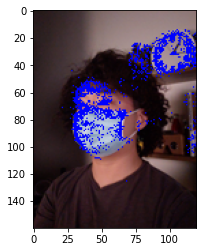

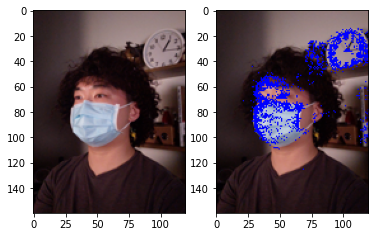

(3292, 2)
2
bad pts:  1403
/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/curls/blue-colmap/000002_rgb.png


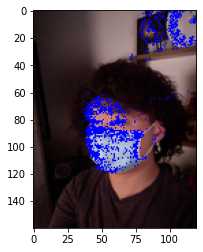

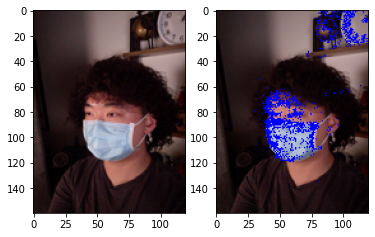

(3292, 2)
3
bad pts:  1240
/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/curls/blue-colmap/000003_rgb.png


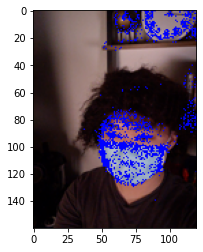

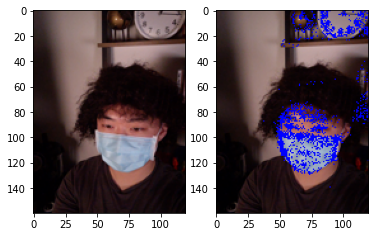

(3292, 2)
4
bad pts:  227
/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/curls/blue-colmap/000004_rgb.png


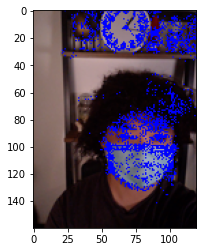

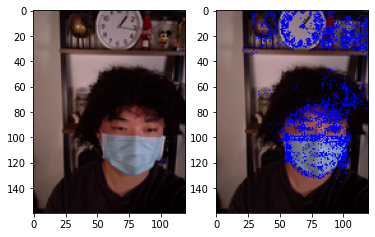

(3292, 2)
5
bad pts:  103
/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/curls/blue-colmap/000005_rgb.png


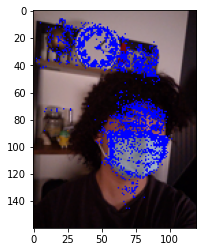

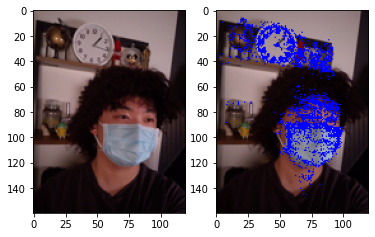

(3292, 2)
6
bad pts:  106
/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/curls/blue-colmap/000006_rgb.png


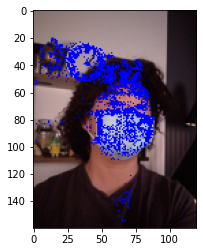

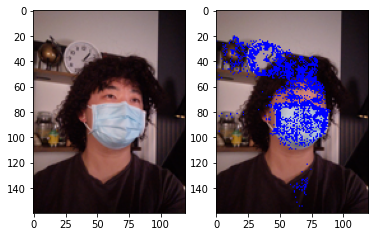

In [266]:
# 3D PTS Projection from IPYNB nerfies projection ON CURLS 

# import required module
import os
import json
import numpy as np
from scipy.spatial.transform import Rotation as R

# test = True
test = False

directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/colmap_outputs/curls'
# directory = '/ubc/cs/research/kmyi/svsamban/research/data-nerfies/curls'
location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/curls/blue-colmap'
new_shape = np.array([120,160])

points = np.load(directory+'/points.npy',allow_pickle=True)
y = json.load(open(directory+'/scene.json'))
directory = directory+'/camera'  


blue = {}
i = 0
# iterate over files in that directory
for NLRkey in [0, 1, 2, 3, 4, 5, 6]:
    key = NLRkey + 1
    # key = NLRkey 
    
    file = open(directory+'/'+str(key).zfill(6)+'.json')
    # file = open(directory+'/left1_'+str(key).zfill(6)+'.json')
    cam = json.load(file)

    # batch_shape = points.shape[:-1]
    points = points.reshape((-1, 3))
    # local_points = self.points_to_local_points(points)
    translated_points = points - cam['position']
    local_points = (np.matmul(cam['orientation'], translated_points.T)).T

    # Get normalized local pixel positions.
    x = local_points[..., 0] / local_points[..., 2]
    y = local_points[..., 1] / local_points[..., 2]

    # Apply radial distortion.
    r2 = x**2 + y**2
    distortion = 1.0 + r2 * (
        cam['radial_distortion'][0] + r2 *
        (cam['radial_distortion'][1] + cam['radial_distortion'][2] * r2))

    # Apply tangential distortion.
    x_times_y = x * y
    x = (
        x * distortion + 2.0 * cam['tangential_distortion'][0] * x_times_y +
        cam['tangential_distortion'][1] * (r2 + 2.0 * x**2))
    y = (
        y * distortion + 2.0 * cam['tangential_distortion'][1] * x_times_y +
        cam['tangential_distortion'][0] * (r2 + 2.0 * y**2))

    # Map the distorted ray to the image plane and return the depth.
    pixel_x = cam['focal_length'] * x + cam['skew'] * y + cam['principal_point'][0]
    pixel_y = cam['focal_length'] * cam['pixel_aspect_ratio'] * y + cam['principal_point'][1]

    pixels = np.stack([pixel_x, pixel_y], axis=-1)
    blue[NLRkey] = pixels


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import torch

ii=0
print(blue.keys())
for id in sorted(blue.keys()):

    b = np.array(blue[id])
    print(b.shape)


    im2 = location[:-7]+'-og/'+str(id).zfill(6)+'_rgb.png'

    img2 = mpimg.imread(im2)
    og_shape = img2.shape
    img2 = np.array(Image.fromarray((img2*255).astype(np.uint8)).resize(new_shape))
    img2og = img2.copy()
    bad = 0
    for i in range(len(b)):
        x1 = int(b[i,1]/(og_shape[1]/new_shape[0]))
        x2 = int(b[i,0]/(og_shape[0]/new_shape[1]))
        # x1 = int(b[i,1]/20.4)
        # x2 = int(b[i,0]/20.4)
        if x1 < new_shape[1] and x2 < new_shape[0] and x1 > -1 and x2 > -1:
            if test:
                img2[x1,x2,:] = [0,255.,255.]
            else:
                img2[x1,x2,:] = [0,0.,255.]
        else:
            bad = bad + 1
            pass
    


    print(id)
    print('bad pts: ', bad)
    plt.imshow(img2)
    fig=plt.figure()
    fig.add_subplot(1,2,ii+2)
    plt.imshow(img2)
    fig.add_subplot(1,2,ii+1)
    plt.imshow(img2og)

    img2og = Image.fromarray((img2og).astype(np.uint8))
    img2   = Image.fromarray((img2).astype(np.uint8))
    img2.save(location+'/'+str(id).zfill(6)+'_rgb.png')
    print(location+'/'+str(id).zfill(6)+'_rgb.png')
    img2og.save(location+'/'+str(id).zfill(6)+'_rgb_OG.png')

    plt.show()

In [265]:
img2.shape

(800, 600, 3)

In [257]:
new_shape

array([120, 160])

In [268]:
print(800*600*3)
print

1440000
5.0


In [247]:
pixels

array([[365.81813452, 384.36253306],
       [371.52165449, 361.73952543],
       [433.82726203, 393.09381867],
       ...,
       [365.31434334, 357.03874493],
       [335.36854398, 242.17530542],
       [239.38858053, 472.70482119]])

dict_keys([0, 1, 2, 3, 4, 5, 6])
(520, 2)
0
bad pts:  4
/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/lv1/blue-colmap/000000_rgb.png


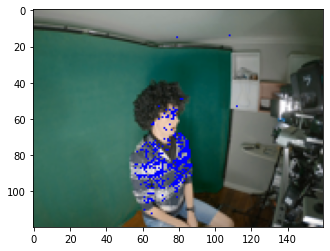

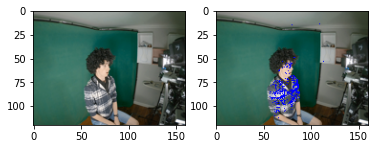

(520, 2)
1
bad pts:  6
/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/lv1/blue-colmap/000001_rgb.png


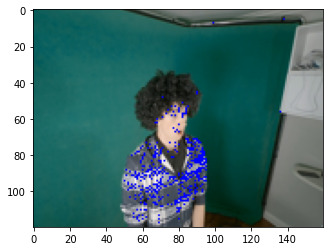

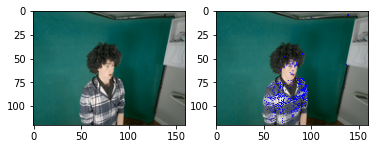

(520, 2)
2
bad pts:  6
/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/lv1/blue-colmap/000002_rgb.png


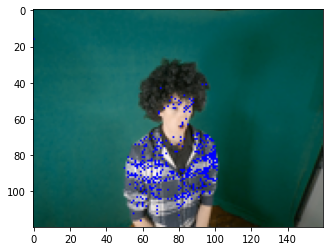

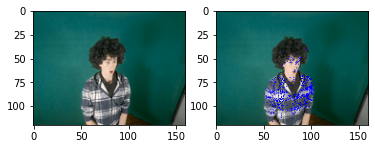

(520, 2)
3
bad pts:  7
/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/lv1/blue-colmap/000003_rgb.png


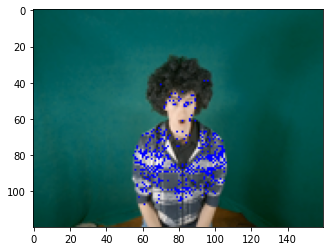

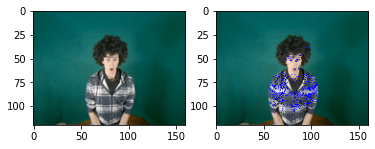

(520, 2)
4
bad pts:  6
/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/lv1/blue-colmap/000004_rgb.png


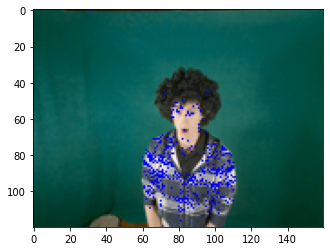

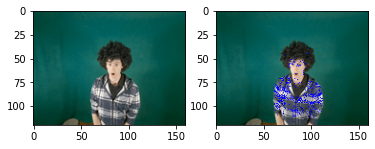

(520, 2)
5
bad pts:  3
/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/lv1/blue-colmap/000005_rgb.png


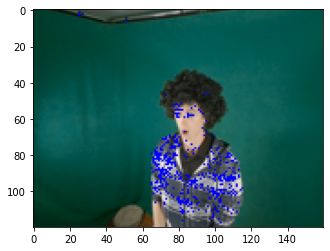

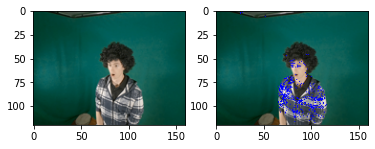

(520, 2)
6
bad pts:  3
/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/lv1/blue-colmap/000006_rgb.png


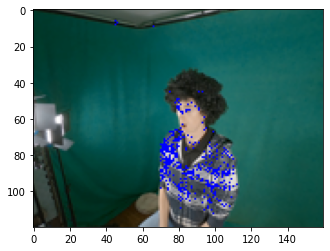

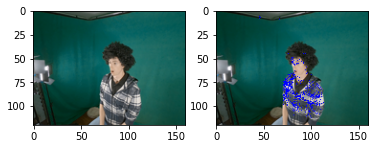

In [288]:
# 3D PTS Projection from IPYNB nerfies projection ON NLR 

# import required module
import os
import json
import numpy as np
from scipy.spatial.transform import Rotation as R

# test = True
test = False

directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/colmap_outputs/lv1'
# directory = '/ubc/cs/research/kmyi/svsamban/research/data-nerfies/curls'
location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/lv1/blue-colmap'
new_shape = np.array([160,120])

points = np.load(directory+'/points.npy',allow_pickle=True)
y = json.load(open(directory+'/scene.json'))
directory = directory+'/camera'  


blue = {}
i = 0
# iterate over files in that directory
for NLRkey in [0, 1, 2, 3, 4, 5, 6]:
    key = NLRkey + 1
    # key = NLRkey 
    
    file = open(directory+'/'+str(key).zfill(6)+'.json')
    # file = open(directory+'/left1_'+str(key).zfill(6)+'.json')
    cam = json.load(file)

    # batch_shape = points.shape[:-1]
    points = points.reshape((-1, 3))
    # local_points = self.points_to_local_points(points)
    translated_points = points - cam['position']
    local_points = (np.matmul(cam['orientation'], translated_points.T)).T

    # Get normalized local pixel positions.
    x = local_points[..., 0] / local_points[..., 2]
    y = local_points[..., 1] / local_points[..., 2]

    # Apply radial distortion.
    r2 = x**2 + y**2
    distortion = 1.0 + r2 * (
        cam['radial_distortion'][0] + r2 *
        (cam['radial_distortion'][1] + cam['radial_distortion'][2] * r2))

    # Apply tangential distortion.
    x_times_y = x * y
    x = (
        x * distortion + 2.0 * cam['tangential_distortion'][0] * x_times_y +
        cam['tangential_distortion'][1] * (r2 + 2.0 * x**2))
    y = (
        y * distortion + 2.0 * cam['tangential_distortion'][1] * x_times_y +
        cam['tangential_distortion'][0] * (r2 + 2.0 * y**2))

    # Map the distorted ray to the image plane and return the depth.
    pixel_x = cam['focal_length'] * x + cam['skew'] * y + cam['principal_point'][0]
    pixel_y = cam['focal_length'] * cam['pixel_aspect_ratio'] * y + cam['principal_point'][1]

    pixels = np.stack([pixel_x, pixel_y], axis=-1)
    blue[NLRkey] = pixels


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import torch

ii=0
print(blue.keys())
for id in sorted(blue.keys()):

    b = np.array(blue[id])
    print(b.shape)


    im2 = location[:-7]+'-og/'+str(id).zfill(6)+'_rgb.png'

    img2 = mpimg.imread(im2)
    shape = img2.shape
    img2 = np.array(Image.fromarray((img2*255).astype(np.uint8)).resize(new_shape))
    img2og = img2.copy()
    bad = 0
    for i in range(len(b)):
        x1 = int(b[i,1]/(shape[0]/new_shape[1]))
        x2 = int(b[i,0]/(shape[1]/new_shape[0]))
        # x1 = int(b[i,1]/20.4)
        # x2 = int(b[i,0]/20.4)
        if x1 < new_shape[1] and x2 < new_shape[0] and x1 > -1 and x2 > -1:
            if test:
                img2[x1,x2,:] = [0,255.,255.]
            else:
                img2[x1,x2,:] = [0,0.,255.]
        else:
            bad = bad + 1
            pass
    


    print(id)
    print('bad pts: ', bad)
    plt.imshow(img2)
    fig=plt.figure()
    fig.add_subplot(1,2,ii+2)
    plt.imshow(img2)
    fig.add_subplot(1,2,ii+1)
    plt.imshow(img2og)

    img2og = Image.fromarray((img2og).astype(np.uint8))
    img2   = Image.fromarray((img2).astype(np.uint8))
    img2.save(location+'/'+str(id).zfill(6)+'_rgb.png')
    print(location+'/'+str(id).zfill(6)+'_rgb.png')
    img2og.save(location+'/'+str(id).zfill(6)+'_rgb_OG.png')

    plt.show()

In [284]:
shape[0]/new_shape[1]

5.0

In [ ]:
# 3D PTS Projection from IPYNB nerfies projection

# W MATMUL !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# import required module
import os
import json
import numpy as np
from scipy.spatial.transform import Rotation as R
import torch

test = False
test = True

directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/colmap_outputs/scan24/'
location =  '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/'

if test:
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/blue/'
else:
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan24/blue-colmap-points/'

points = np.load(directory+'points.npy',allow_pickle=True)
scene = json.load(open(directory+'scene.json'))
directory = directory+'camera'




blue = {}
i = 0
# iterate over files in that directory
for NLRkey in [1, 9, 17, 23, 31, 38, 44]:
    if NLRkey == 1:
        key = 2
    if NLRkey == 9:
        key = 10
    if NLRkey == 17:
        key = 18
    if NLRkey == 23:
        key = 26
    if NLRkey == 31:
        key = 35
    if NLRkey == 38:
        key = 42
    if NLRkey == 44: 
        key = 48
    
    file = open(directory+'/'+str(key).zfill(6)+'.json')
    cam = json.load(file)

    # batch_shape = points.shape[:-1]
    points = points.reshape((-1, 3))
    # local_points = self.points_to_local_points(points)
    translated_points = points - cam['position']
    local_points = (np.matmul(cam['orientation'], translated_points.T)).T
    
    points_homog = np.concatenate((points.T, np.ones_like(points)[:,0].reshape(1,-1)), 0)



    
    # # MY OFFICIAL VERSION

    
    ## VIEW MATRIX
    # T = np.eye(4)
    # T[:3,3] = -1*np.array(cam['position'])
    # R = np.eye(4)
    # R[:3,:3] = np.array(cam['orientation'])
    # V = np.matmul(R,T)
    # ## OR
    # Rt = np.concatenate((np.array(cam['orientation']).T,np.array([cam['position']]).transpose()),axis=-1)
    # Rt = np.concatenate((Rt,np.array([[0,0,0,1]])),axis=0)
    # Rt = np.linalg.inv(Rt) 
    # V = Rt

    # local_points = np.matmul(V,points_homog).T

    # K = np.eye(4)
    # fx = cam['focal_length']
    # fy = cam['focal_length'] * cam['pixel_aspect_ratio']
    # cx = cam['principal_point'][0]
    # cy = cam['principal_point'][1]
    # w  = cam['image_size'][0]
    # h  = cam['image_size'][1]
    # zn = scene['near']*scene['scale']
    # zf = scene['far']/scene['scale']

    # K[0][0] = 2*fx/w 
    # K[0][2] = 2*cx/w - 1

    # K[1][1] = -2*fy/h
    # K[1][2] = 1 - 2*cy/h

    # K[2][2] = -(zn+zf)/(zn-zf)
    # K[2][3] = -(zn*zf)/(zn-zf)*2

    # K[3][2] = 1.

    # # Map the distorted ray to the image plane and return the depth.
    # local_points = np.matmul(K,local_points.T).T
    # # print(local_points.shape)
    # local_points[..., 0] = local_points[..., 0] / local_points[..., 3]
    # local_points[..., 1] = local_points[..., 1] / local_points[..., 3]
    # local_points[..., 2] = local_points[..., 2] / local_points[..., 3]
    # local_points[..., 0] = local_points[..., 0] / local_points[..., 2]
    # local_points[..., 1] = local_points[..., 1] / local_points[..., 2]
    # local_points[..., 2] = local_points[..., 2] / local_points[..., 2]
    # pixels = local_points[...,:2]
    # # print(pixels.shape)
    # blue[NLRkey] = pixels




    
    # # MY TEST VERSION

    # T = np.eye(4)
    # T[:3,3] = -1*np.array(cam['position'])
    # R = np.eye(4)
    # R[:3,:3] = np.array(cam['orientation'])
    # V = np.matmul(R,T)*np.array([[1,-1,-1,1]]).T
    # ## OR
    # Rt = np.concatenate((np.array(cam['orientation']).T,np.array([cam['position']]).transpose()),axis=-1)
    # Rt = np.concatenate((Rt,np.array([[0,0,0,1]])),axis=0)
    # Rt = np.linalg.inv(Rt)*np.array([[1,-1,-1,1]]).T
    # V = Rt


    # local_points = np.matmul(V,points_homog).T

    # P = np.zeros((4,4))
    # fx = cam['focal_length']
    # fy = cam['focal_length'] * cam['pixel_aspect_ratio']
    # cx = cam['principal_point'][0]
    # cy = cam['principal_point'][1]
    # w  = cam['image_size'][0]
    # h  = cam['image_size'][1]
    # zn = scene['near']*scene['scale']
    # zf = scene['far']/scene['scale']

    # P[0][0] = 2*fx/w 
    # P[0][2] = 1 - 2*cx/w 

    # P[1][1] = 2*fy/h
    # P[1][2] = 2*cy/h - 1

    # P[2][2] = (zn+zf)/(zn-zf)
    # P[2][3] = (zn*zf)/(zn-zf)*2

    # P[3][2] = -1.

    # # Map the distorted ray to the image plane and return the depth.
    # local_points = np.matmul(P,local_points.T).T
    # # print(local_points.shape)
    # local_points[..., 0] = local_points[..., 0] / local_points[..., 3]
    # local_points[..., 1] = local_points[..., 1] / local_points[..., 3]
    # local_points[..., 2] = local_points[..., 2] / local_points[..., 3]
    # local_points[..., 0] = local_points[..., 0] / local_points[..., 2]
    # local_points[..., 1] = local_points[..., 1] / local_points[..., 2]
    # local_points[..., 2] = local_points[..., 2] / local_points[..., 2]
    # pixels = local_points[...,:2]
    # # print(pixels.shape)
    # blue[NLRkey] = pixels


    # MY TEST VERSION of doing METANLR ON NERFIE PTS

    T = np.eye(4)
    T[:3,3] = -1*np.array(cam['position'])
    R = np.eye(4)
    R[:3,:3] = np.array(cam['orientation'])
    V = np.matmul(R,T)*np.array([[1,-1,-1,1]]).T
    ## OR
    # Rt = np.concatenate((np.array(cam['orientation']).T,np.array([cam['position']]).transpose()),axis=-1)
    # Rt = np.concatenate((Rt,np.array([[0,0,0,1]])),axis=0)
    # Rt = np.linalg.inv(Rt)*np.array([[1,-1,-1,1]]).T
    # V = Rt


    P = np.zeros((4,4))
    fx = cam['focal_length']
    fy = cam['focal_length'] * cam['pixel_aspect_ratio']
    cx = cam['principal_point'][0]
    cy = cam['principal_point'][1]
    w  = cam['image_size'][0]
    h  = cam['image_size'][1]
    zn = scene['near']*scene['scale']
    zf = scene['far']/scene['scale']

    P[0][0] = 2*fx/w 
    P[0][2] = 1 - 2*cx/w 

    P[1][1] = 2*fy/h
    P[1][2] = 2*cy/h - 1

    P[2][2] = (zn+zf)/(zn-zf)
    P[2][3] = (zn*zf)/(zn-zf)*2

    P[3][2] = -1.

    M = np.load('./my_data/my_dtu/nlr/test/model_matrix.npy',allow_pickle=True).item()['model_matrix']
    # print(M)
    # Map the distorted ray to the image plane and return the depth.
    source_pos_homog = torch.tensor(points_homog).double() 

    # source_pos_homog = torch.cat((source_pos, torch.ones_like(source_pos)[0].unsqueeze(0)), 0)
    # projected_pos_homog = torch.tensor(M).double()  @ source_pos_homog
    # projected_pos_homog = torch.tensor(V).double()  @ projected_pos_homog
    projected_pos_homog = torch.tensor(V).double()  @ source_pos_homog
    projected_pos_homog = torch.tensor(P).double()  @ projected_pos_homog

    w = projected_pos_homog[3, :].unsqueeze(0)
    projected_pos_homog = projected_pos_homog / torch.where(torch.abs(w)>1e-8, w, torch.ones(w.shape).double().to(w.device)*1e-8)
    z = projected_pos_homog[2, :].unsqueeze(0)
    projected_pos_homog = projected_pos_homog / torch.where(torch.abs(z)>1e-8, z, torch.ones(z.shape).double() .to(z.device)*1e-8)
    projected_pos = projected_pos_homog[:2, :].T
    blue[NLRkey] = projected_pos
    # yellow  
# np.save('./my_data/my_dtu/nlr/test/blue/ptsproj.npy', SneDict, allow_pickle=True)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import torch

ii=0
print(blue.keys())
for id in sorted(blue.keys()):

    b = np.array(blue[id])#.cpu().detach())#.transpose()

    if test:
        im2 = './my_data/dtu_v3/processed/scan24/blue-colmap-points/'+str(id).zfill(6)+'_rgb.png'
    else:
        im2 = './my_data/my_dtu/nlr/test/og/'+str(id).zfill(6)+'_rgb.png'

    img2 = mpimg.imread(im2)
    img2 = np.array(Image.fromarray((img2*255).astype(np.uint8)).resize((160,120)))
    img2og = img2.copy()
    bad = 0
    for i in range(len(b)):
        x1 = int(b[i,1] * -60 + 60)
        x2 = int(b[i,0] * 80 + 80)
        # x1 = int(b[i,1]/10)
        # x2 = int(b[i,0]/10)
        # img2[x1,x2,:] = [0,255.,255.]
        if x1 < 120 and x2 < 160 and x1 > -1 and x2 > -1:
            # print('good',x1, x2)
            if test:
                img2[x1,x2,:] = [0,255.,255.]
            else:
                img2[x1,x2,:] = [0,0.,255.]
        else:
            bad += 1
            # print('bad',x1, x2)
            pass


    print(id)
    print(bad, ' bad points')
    plt.imshow(img2)
    fig=plt.figure()
    fig.add_subplot(1,2,ii+2)
    plt.imshow(img2)
    fig.add_subplot(1,2,ii+1)
    plt.imshow(img2og)

    img2og = Image.fromarray((img2og).astype(np.uint8))
    img2   = Image.fromarray((img2).astype(np.uint8))
    img2.save(location+str(id).zfill(6)+'_rgb.png')
    img2og.save(location+str(id).zfill(6)+'_rgb_OG.png')

    plt.show()
    # print(np.amin(b,axis=0))
    # print(id)
    print(np.amin(b),np.amax(b))

In [ ]:
np.array([[1,-1,-1,1]]).T

In [ ]:
pixels

In [ ]:
projected_pos.T

In [ ]:
M = np.eye(4)
M = M*scene['scale']
x = np.append(np.array([scene['center']]),1)[:4]
print(x)
M[...,3] = x

print(np.linalg.inv(M))


In [ ]:
print(np.min(points,axis=0))
print(np.max(points,axis=0))
print(P)

In [ ]:

coords = points
print(points.shape)
coord_min = np.min(coords, axis=0)
coord_max = np.max(coords, axis=0)
pcd_center = (coord_min + coord_max) / 2
translation = -pcd_center
diff_center = np.linalg.norm(coords + translation, axis=1)
max_radius = diff_center.max()
scale = 1 / max_radius
norm_matrix = np.eye(4, dtype=np.float32)
norm_matrix[0, 0] = scale
norm_matrix[1, 1] = scale
norm_matrix[2, 2] = scale
norm_matrix[:3, 3] = translation * scale
M = norm_matrix
# M = torch.from_numpy(np.linalg.inv(norm_matrix))
print(M)
x = np.matmul(M,points_homog)
print(np.min(x,axis=1))
print(np.max(x,axis=1))
print(np.linalg.inv(M)/scene['scale'])

In [ ]:
T = np.zeros((4,4))
T[0][0] = w/2
T[0][3] = w/2
T[1][1] =-h/2
T[1][3] = h/2
print(T)
print(np.matmul(T, local_points.T).T)

In [ ]:
# 3D PTS Projection from IPYNB nerfies projection #WITH MATMUL

# import required module
import os
import json
import numpy as np
from scipy.spatial.transform import Rotation as R


directory = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/scan24/'
location =  '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/'
test = True
# test = False
if test:
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/blue/'
else:
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan24/blue/'

points = np.load(directory+'points.npy',allow_pickle=True)
y = json.load(open(directory+'scene.json'))
directory = directory+'camera'


blue = {}
i = 0
# iterate over files in that directory
for NLRkey in [1, 9, 17, 23, 31, 38, 44]:
    if NLRkey == 1:
        key = 2
    if NLRkey == 9:
        key = 10
    if NLRkey == 17:
        key = 18
    if NLRkey == 23:
        key = 26
    if NLRkey == 31:
        key = 35
    if NLRkey == 38:
        key = 42
    if NLRkey == 44: 
        key = 48
    
    file = open(directory+'/'+str(key).zfill(6)+'.json')
    cam = json.load(file)


    points2 = np.concatenate((points.T, np.ones_like(points)[:,0].reshape(1,-1)), 0)
    T = np.eye(4)
    T[:3,3] = -1*np.array(cam['position'])
    R = np.eye(4)
    R[:3,:3] = np.array(cam['orientation'])
    Rt = np.matmul(R,T) 
    
    # ## VIEW MATRIX
    # RtMy = np.concatenate((np.array(cam['orientation']),np.array([cam['position']]).transpose()),axis=-1)
    # RtMy = np.concatenate((RtMy,np.array([[0,0,0,1]])),axis=0)
    # RtMy = np.linalg.inv(RtMy) 
    # Rtog = np.load('./my_data/dtu_v3/processed/scan24/'+str(NLRkey).zfill(6)+'_rgb_meta.npy',allow_pickle=True).item()['view']
    # print(Rt-RtMy<0.0001)
    # print(Rt-RtMy.T<0.0001)
    # print('./my_data/my_dtu/nlr/test/'+str(NLRkey).zfill(6)+'_rgb_meta.npy')
    # print(Rt)
    # print(RtMy)
    # print(Rtog)
    # Rt = np.load('./my_data/my_dtu/nlr/test/'+str(NLRkey).zfill(6)+'_rgb_meta.npy',allow_pickle=True).item()['view']
    # print(Rt)
    # print('-------------------------------')
    local_points = (np.matmul(Rt,points2)).T
    # print(points2.shape, local_points.shape)
    # local_points = local_points2


    # GLtoCV = np.eye(4)
    # np.fill_diagonal(GLtoCV, [1,-1,-1,1])
    # local_points = np.matmul(GLtoCV, local_points.T).T

    #NERFIES P 
    P = np.eye(4)
        
    width, height = cam['image_size']
    fx = cam['focal_length']
    fy = cam['focal_length'] * cam['pixel_aspect_ratio']
    px, py = cam['principal_point']
    zfar  = 1e3
    znear = 1
    s = cam['skew']
    
    P[0][0] = fx
    P[0][1] = s
    P[0][2] = px

    P[1][1] = fy
    P[1][2] = py
    # np.set_printoptions(suppress=True)
    # # print(P)
    # P1 = P
    # pixels = np.matmul(P,local_points2.T)
    # # print(pixels.T)
# ## PROJECTION MATRIX
        
    # width, height = cam['image_size']
    # fx = cam['focal_length']
    # fy = cam['focal_length'] #* y['pixel_aspect_ratio']
    # cx, cy = cam['principal_point']
    # zfar  = 1e3
    # znear = 1

    # m = np.eye(4, dtype=np.float32)
    # m[0][0] = 2.0 * fx / width
    # m[0][1] = 0.0
    # m[0][2] = 0.0
    # m[0][3] = 0.0

    # m[1][0] = 0.0
    # m[1][1] = 2.0 * fy / height
    # m[1][2] = 0.0
    # m[1][3] = 0.0

    # m[2][0] = 1.0 - 2.0 * cx / width
    # m[2][1] = 1.0 - 2.0 * cy / height
    # m[2][2] = (zfar + znear) / (znear - zfar)
    # m[2][3] = -1.0

    # m[3][0] = 0.0
    # m[3][1] = 0.0
    # m[3][2] = 2.0 * zfar * znear / (znear - zfar)
    # m[3][3] = 0.0

    # P = m.T
    local_points = np.matmul(P,local_points.T)
    
    local_points[..., 0] = local_points[..., 0] / local_points[..., 2]
    local_points[..., 1] = local_points[..., 1] / local_points[..., 2]
    local_points[..., 2] = local_points[..., 2] / local_points[..., 2]

    pixels = local_points

    blue[NLRkey] = pixels[:2].T
    



import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import torch

ii=0
print(blue.keys())
for id in sorted(blue.keys()):

    b = np.array(blue[id])#.cpu().detach())#.transpose()

    if test:
        im2 = './my_data/dtu_v3/processed/scan24/blue/'+str(id).zfill(6)+'_rgb.png'
    else:
        im2 = './my_data/my_dtu/nlr/test/og/'+str(id).zfill(6)+'_rgb.png'

    img2 = mpimg.imread(im2)
    img2 = np.array(Image.fromarray((img2*255).astype(np.uint8)).resize((160,120)))
    img2og = img2.copy()
     
    bad = 0
    for i in range(len(b)):
        x1 = int(b[i,1] * -60 + 60)
        x2 = int(b[i,0] * 80 + 80)
        # x1 = int(b[i,1]/10)
        # x2 = int(b[i,0]/10)
        # img2[x1,x2,:] = [0,255.,255.]
        if x1 < 120 and x2 < 160 and x1 > -1 and x2 > -1:
            # print('good',x1, x2)
            if test:
                img2[x1,x2,:] = [0,255.,255.]
            else:
                img2[x1,x2,:] = [0,0.,255.]
        else:
            bad = bad + 1
    


    print(id)
    print(bad, ' bad points')
    plt.imshow(img2)
    fig=plt.figure()
    fig.add_subplot(1,2,ii+2)
    plt.imshow(img2)
    fig.add_subplot(1,2,ii+1)
    plt.imshow(img2og)

    img2og = Image.fromarray((img2og).astype(np.uint8))
    img2   = Image.fromarray((img2).astype(np.uint8))
    img2.save(location+str(id).zfill(6)+'_rgb.png')
    img2og.save(location+str(id).zfill(6)+'_rgb_OG.png')

    plt.show()
    print(np.amin(b),np.amax(b))


In [ ]:

blue = {}
i = 0
# iterate over files in that directory
for NLRkey in [1, 9, 17, 23, 31, 38, 44]:
    if NLRkey == 1:
        key = 2
    if NLRkey == 9:
        key = 10
    if NLRkey == 17:
        key = 18
    if NLRkey == 23:
        key = 26
    if NLRkey == 31:
        key = 35
    if NLRkey == 38:
        key = 42
    if NLRkey == 44: 
        key = 48
    
    file = open(directory+'/'+str(key).zfill(6)+'.json')
    cam = json.load(file)


    points2 = np.concatenate((points.T, np.ones_like(points)[:,0].reshape(1,-1)), 0)
    T = np.eye(4)
    T[:3,3] = -1*np.array(cam['position'])
    R = np.eye(4)
    R[:3,:3] = np.array(cam['orientation'])
    Rt = np.matmul(R,T)
    
    ## VIEW MATRIX
    print(NLRkey)
    RtMy = np.load('/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/'+str(NLRkey).zfill(6)+'_rgb_meta.npy',allow_pickle=True).item()['view']
    # print(np.abs(Rt-RtMy)<0.0001)
    # print(Rt-RtMy.T<0.0001)
    print(Rt)
    print(RtMy)
    print('-------------------------------')


In [ ]:
# 3D PTS Projection from NLR code
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import torch

test = True
test = False
if test:
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/my_dtu/nlr/test/blue/'
else:
    location = '/ubc/cs/research/kmyi/svsamban/research/metanlrpp/my_data/dtu_v3/processed/scan24/blue/'
blue = np.load(location+'blue.npy',allow_pickle=True).item()

ii=0
# print('HPWDY', blue[1].shape)
print(blue.keys())
for id in sorted(blue.keys()):

    b = np.array(blue[id].cpu().detach())#.transpose()
    x = b[..., 0] / b[..., 2]
    y = b[..., 1] / b[..., 2]
    z = b[..., 2] / b[..., 2]
    b = np.stack([x, y, z], axis=-1)

    if test:
        im2 = './my_data/dtu_v3/processed/scan24/blue/'+str(id).zfill(6)+'_rgb.png'
    else:
        im2 = './my_data/dtu_v3/processed/scan24/blue/'+str(id).zfill(6)+'_rgb_OG.png'

    img2 = mpimg.imread(im2)
    img2 = np.array(Image.fromarray((img2*255).astype(np.uint8)).resize((160,120)))
    img2og = img2.copy()

    for i in range(len(b)):
        x1 = int(b[i,1] * -60 + 60)
        x2 = int(b[i,0] * 80 + 80)
        # x1 = int(b[i,1]/10)
        # x2 = int(b[i,0]/10)
        # img2[x1,x2,:] = [0,255.,255.]
        if x1 < 120 and x2 < 160 and x1 > -1 and x2 > -1:
            # print('good',x1, x2)
            if test:
                img2[x1,x2,:] = [0,0.,255.]
            else:
                img2[x1,x2,:] = [0,255.,255.]
        else:
            # print('bad',x1, x2)
            pass


    print(id)
    plt.imshow(img2)
    fig=plt.figure()
    fig.add_subplot(1,2,ii+2)
    plt.imshow(img2)
    fig.add_subplot(1,2,ii+1)
    plt.imshow(img2og)

    img2og = Image.fromarray((img2og).astype(np.uint8))
    img2   = Image.fromarray((img2).astype(np.uint8))
    img2.save(location+str(id).zfill(6)+'_rgb.png')
    img2og.save(location+str(id).zfill(6)+'_rgb_OG.png')

    plt.show()
    # print(np.amin(b,axis=0))
    # print(id)
    print(np.amin(b),np.amax(b))
    # red